In [3]:
!pip install python-mnist
!pip install tensorflow
!pip install matplotlib

In [4]:
from mnist import MNIST

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt

In [8]:
def load_dataset():

    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    assert x_train.shape == (60000, 28, 28)
    assert x_test.shape == (10000, 28, 28)
    assert y_train.shape == (60000,)
    assert y_test.shape == (10000,)
    
    prop = 0.25
    size = int(60000*(1-prop))
    
    train_data = tf.data.Dataset.from_tensor_slices((x_train[:size],y_train[:size]))
    valid_data = tf.data.Dataset.from_tensor_slices((x_train[size+1:],y_train[size+1:]))
    test_data = tf.data.Dataset.from_tensor_slices((x_test,y_test))

    train_data = train_data.take(1000)
    valid_data = valid_data.take(400)
    test_data = test_data.take(200)
    
    train_data = train_data.batch(32)
    valid_data = valid_data.batch(32)
    test_data = test_data.batch(32)
    
    return train_data, valid_data, test_data

In [6]:
def setup_model():
    model = models.Sequential()
    model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(28,28,1)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    
    print(model.summary())

    return model

In [1]:
def train_model(model,dataset):
    epochs = 15
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
                  
    history = model.fit(dataset[0], epochs=epochs, verbose=2, validation_data=dataset[1],
                        callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                            patience=1, min_lr=0.00001, verbose=1)])

    #fig, axs = plt.subplots(2)
    #fig.suptitle('Loss and Accuracy of model')
    #axs[0].plot(history.history['loss'], label='loss')
    #axs[0].set_title("loss")
    #axs[1].plot(history.history['accuracy'], label='accuracy')
    #axs[1].plot(history.history['val_accuracy'], label='val_accuracy')
    #axs[1].set_title("Accuracy")
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='lower right')
    plt.show()
    
    res = model.evaluate(dataset[2], verbose=2)

    return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 16)          6416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 16)         

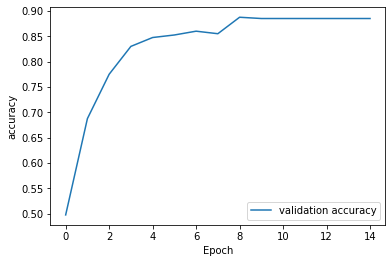

7/7 - 0s - loss: 0.2243 - accuracy: 0.9200 - 51ms/epoch - 7ms/step


In [9]:
    dataset = load_dataset()
    
    model = setup_model()
    
    model = train_model(model,dataset)